<a href="https://colab.research.google.com/github/vaishnavir33/Major-Project/blob/main/COVID_19_Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [14]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [15]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642


In [16]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [17]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428,2430,2430,2430,2432,2433,2435,2436,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600,1617,1636,1653,1666,1681,1696,1715,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947,2950,2954,2958,2961,2964,2967,2970,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,106,106,106,106,106,107,107,107,107,107,107,107,107,107,109,110,110,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,475,478,487,487,490,491,492,493,494,496,498,498,498,499,499,500,501,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524


In [18]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [19]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48042,48109,48133,48279,48390,48392,48395,48433,48514,48626,48798,48803,48820,48834,48895,48967,49086,49281,49285,49288,49333,49344,49347,49359,49362,49362,49369,49378,49402,49409,49499,49499,49499,49471,49477,49481,49499,49536,49664,49681
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52128,52933,53616,54362,55243,55983,56764,57736,58794,59684,60675,61605,62533,63329,64318,65403,66309,67158,68007,68969,69773,70413,71173,72076,72853,73610,74352,75190,75887,76784,77498,78259,79131,79821,80483,81061,81810,82554,83264,83954
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74871,75057,75243,75436,75628,75816,75999,76168,76330,76489,76640,76797,76940,77076,77225,77382,77537,77683,77842,77976,78098,78234,78377,78524,78672,78824,78946,79064,79187,79319,79428,79556,79672,79783,79887,79994,80103,80219,80347,80455
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9610,9674,9732,9781,9833,9868,9911,9965,10022,10066,10101,10146,10170,10206,10245,10285,10319,10356,10394,10429,10446,10475,10501,10560,10564,10584,10599,10626,10661,10685,10708,10708,10754,10775,10796,10795,10861,10883,10904,10925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18596,18623,18687,18710,18786,18790,18795,18884,18929,18951,18972,18991,19005,19013,19190,19207,19221,19238,19307,19315,19322,19400,19410,19509,19553,19624,19640,19647,19657,19677,19761,19827,19835,19848,19850,19948,19971,20028,20032,20065


In [20]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [21]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-16 04:44:59,34.223334,-82.461707,165,1,0,164.0,"Abbeville, South Carolina, US",672.728014,0.606061
1,22001.0,Acadia,Louisiana,US,2020-07-16 04:44:59,30.295065,-92.414197,1510,46,0,1464.0,"Acadia, Louisiana, US",2433.717463,3.046358
2,51001.0,Accomack,Virginia,US,2020-07-16 04:44:59,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-16 04:44:59,43.452658,-116.241552,4836,28,0,4808.0,"Ada, Idaho, US",1004.179930,0.578991
4,19001.0,Adair,Iowa,US,2020-07-16 04:44:59,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [22]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/10/21', '3/11/21', '3/12/21', '3/13/21', '3/14/21', '3/15/21',
       '3/16/21', '3/17/21', '3/18/21', '3/19/21'],
      dtype='object', length=427)

In [23]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [24]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383,2392,2403,2412,2421,2426,2432,2448,2448,2475,2482,2488,2494,2501,2512,2524,2526,2529,2533,2550,2553,2554,2557,2560,2567,2570,2571
270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635,174969,176377,177768,179293,180848,181909,183612,185336,187309,189326,191203,193029,194548,196812,198554,200382,202378,203669,205652,207436,209304,211602,213791,215984,218061,219912
271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165,2176,2187,2221,2255,2267,2269,2285,2310,2342,2363,2375,2411,2444,2473,2545,2586,2627,2667,2729,2771,2836,2908,2969,3037,3126,3217
272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63573,64610,65573,66598,67681,68454,69437,70248,70823,71677,72467,73203,73894,74503,75027,75582,76484,77171,77639,78202,78534,79002,79557,80090,80687,81341,82011,82421,82655,82897,83333,83913,84240,84474,84797,84950,85240,85502,85889,86059


In [25]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [26]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())


In [27]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84122,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146876,
 157950,
 169219,
 184027,
 199970,
 219535,
 246584,
 277359,
 309350,
 344205,
 387040,
 428219,
 479220,
 542097,
 607138,
 674418,
 733655,
 798949,
 875794,
 958586,
 1041649,
 1125200,
 1183589,
 1256181,
 1329324,
 1399153,
 1482508,
 1569527,
 1655062,
 1729373,
 1849067,
 1919799,
 2003766,
 2080914,
 2176465,
 2264462,
 2341702,
 2418307,
 2494325,
 2570074,
 2651321,
 2735570,
 2819666,
 2901925,
 2973513,
 3043705,
 3119245,
 3196355,
 3279850,
 3368226,
 3447426,
 3523799,
 3601488,
 3681990,
 3772017,
 3860724,
 3951003,
 4036226,
 4111202,
 4187833,
 4272324,
 4357304

In [28]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3349,
 3460,
 3564,
 3803,
 3993,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7967,
 8874,
 9985,
 11470,
 13192,
 14877,
 16826,
 19116,
 21926,
 24962,
 28450,
 32180,
 35699,
 39780,
 44528,
 50527,
 56414,
 62574,
 68490,
 73676,
 79614,
 87875,
 94681,
 102464,
 109842,
 116015,
 121873,
 127843,
 134812,
 143278,
 150537,
 158930,
 165082,
 170314,
 176188,
 183463,
 190319,
 197152,
 203920,
 209547,
 213526,
 218271,
 224852,
 231573,
 237416,
 242563,
 248059,
 251569,
 255781,
 261608,
 268110,
 273417,
 278967,
 283191,
 286748,
 290235,
 295721,
 300864,
 306024,
 311247,
 315424,
 318608,
 322371,
 327019,
 331797,
 336459,
 341706,
 345629,
 348643,
 349855,
 354097,
 359152,
 363710,
 368318,


In [29]:
confirmed_sum

122315656

In [30]:
death_sum

2701445

In [31]:
recovered_sum

69264939

In [32]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 6,
 6,
 8,
 8,
 8,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 25,
 32,
 55,
 74,
 107,
 184,
 237,
 403,
 519,
 594,
 782,
 1147,
 1586,
 2219,
 2978,
 3212,
 4679,
 6512,
 9169,
 13663,
 20030,
 26025,
 34898,
 46136,
 56755,
 68837,
 86693,
 105383,
 125013,
 143912,
 165987,
 192301,
 224544,
 256779,
 289066,
 321482,
 351359,
 382740,
 413507,
 444699,
 480640,
 515055,
 544185,
 571440,
 598370,
 627151,
 652591,
 682626,
 715656,
 743588,
 769684,
 799512,
 825429,
 854288,
 887858,
 920185,
 950581,
 977082,
 1000785,
 1025362,
 1051800,
 1081020,
 1115946,
 1143296,
 1167593,
 1191678,
 1216209,
 1240768,
 1268180,
 1295019,
 1320155,
 1339022,
 1358293,
 1381241,
 1401649,
 1428467,
 1453214,
 1477373,
 1495736,
 1518126,
 1539133,
 1561830,
 1587596,
 1611252,
 1632364,
 1652431,
 1671104,
 1690754,
 1709303,
 1731625,
 1756098,
 1779731,
 1798718,
 1816153,
 

In [33]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [34]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [35]:
world_daily_increase

[557,
 98,
 286,
 492,
 685,
 809,
 2651,
 589,
 2068,
 1692,
 2111,
 4749,
 3100,
 4011,
 3745,
 3160,
 3593,
 2734,
 3030,
 2609,
 2042,
 418,
 15153,
 6527,
 2143,
 2183,
 2035,
 1882,
 500,
 560,
 629,
 1761,
 380,
 564,
 853,
 977,
 1360,
 1386,
 1891,
 2381,
 1983,
 2594,
 2308,
 2811,
 3913,
 4095,
 3949,
 4172,
 4822,
 7661,
 5790,
 14384,
 11074,
 11269,
 14808,
 15943,
 19565,
 27049,
 30775,
 31991,
 34855,
 42835,
 41179,
 51001,
 62877,
 65041,
 67280,
 59237,
 65294,
 76845,
 82792,
 83063,
 83551,
 58389,
 72592,
 73143,
 69829,
 83355,
 87019,
 85535,
 74311,
 119694,
 70732,
 83967,
 77148,
 95551,
 87997,
 77240,
 76605,
 76018,
 75749,
 81247,
 84249,
 84096,
 82259,
 71588,
 70192,
 75540,
 77110,
 83495,
 88376,
 79200,
 76373,
 77689,
 80502,
 90027,
 88707,
 90279,
 85223,
 74976,
 76631,
 84491,
 84980,
 96231,
 95732,
 94439,
 78022,
 89167,
 96775,
 101878,
 106644,
 106421,
 104805,
 94211,
 86717,
 93967,
 102762,
 119283,
 120903,
 136515,
 106408,
 95994,


In [36]:
us_daily_increase

[1,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 8,
 7,
 23,
 19,
 33,
 77,
 53,
 166,
 116,
 75,
 188,
 365,
 439,
 633,
 759,
 234,
 1467,
 1833,
 2657,
 4494,
 6367,
 5995,
 8873,
 11238,
 10619,
 12082,
 17856,
 18690,
 19630,
 18899,
 22075,
 26314,
 32243,
 32235,
 32287,
 32416,
 29877,
 31381,
 30767,
 31192,
 35941,
 34415,
 29130,
 27255,
 26930,
 28781,
 25440,
 30035,
 33030,
 27932,
 26096,
 29828,
 25917,
 28859,
 33570,
 32327,
 30396,
 26501,
 23703,
 24577,
 26438,
 29220,
 34926,
 27350,
 24297,
 24085,
 24531,
 24559,
 27412,
 26839,
 25136,
 18867,
 19271,
 22948,
 20408,
 26818,
 24747,
 24159,
 18363,
 22390,
 21007,
 22697,
 25766,
 23656,
 21112,
 20067,
 18673,
 19650,
 18549,
 22322,
 24473,
 23633,
 18987,
 17435,
 21503,
 19845,
 21649,
 25400,
 21160,
 17916,
 17637,
 18384,
 21110,
 23133,
 24866,
 25208,
 18948,
 19819,
 23670,
 27064,
 28525,
 31563,
 

In [37]:
# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [38]:
world_daily_death

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 94,
 111,
 104,
 239,
 190,
 274,
 344,
 306,
 497,
 420,
 641,
 678,
 814,
 907,
 1111,
 1485,
 1722,
 1685,
 1949,
 2290,
 2810,
 3036,
 3488,
 3730,
 3519,
 4081,
 4748,
 5999,
 5887,
 6160,
 5916,
 5186,
 5938,
 8261,
 6806,
 7783,
 7378,
 6173,
 5858,
 5970,
 6969,
 8466,
 7259,
 8393,
 6152,
 5232,
 5874,
 7275,
 6856,
 6833,
 6768,
 5627,
 3979,
 4745,
 6581,
 6721,
 5843,
 5147,
 5496,
 3510,
 4212,
 5827,
 6502,
 5307,
 5550,
 4224,
 3557,
 3487,
 5486,
 5143,
 5160,
 5223,
 4177,
 3184,
 3763,
 4648,
 4778,
 4662,
 5247,
 3923,
 3014,
 1212,
 4242,
 5055,
 4558,
 4608,
 4024,
 2690,
 3073,
 4677,
 5433,
 5032,
 4581,
 3770,
 2737,
 3702,
 4774,
 5040,
 4640,
 4209,
 4114,
 3397,
 3415,
 6710,
 5147,
 4911,
 6065,
 4112,
 4011,
 3563,
 5217,
 5186,
 4685,
 

In [39]:
us_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 4,
 1,
 2,
 3,
 4,
 1,
 6,
 5,
 10,
 8,
 7,
 12,
 27,
 37,
 60,
 72,
 106,
 103,
 121,
 192,
 243,
 333,
 420,
 522,
 642,
 624,
 713,
 1085,
 1284,
 1512,
 1430,
 1565,
 1613,
 1771,
 2578,
 2155,
 2202,
 2194,
 2128,
 1873,
 2013,
 2434,
 2605,
 2143,
 2109,
 1980,
 1970,
 2232,
 2516,
 2452,
 2461,
 2186,
 1710,
 1399,
 1507,
 2227,
 2414,
 2197,
 1905,
 1732,
 1189,
 1379,
 2246,
 2311,
 1926,
 1761,
 1467,
 976,
 1043,
 1600,
 1738,
 1787,
 1670,
 1199,
 818,
 1227,
 1457,
 1500,
 1188,
 1220,
 1086,
 637,
 592,
 677,
 1462,
 1107,
 1133,
 954,
 613,
 776,
 981,
 1011,
 1011,
 894,
 643,
 456,
 507,
 913,
 873,
 830,
 829,
 733,
 342,
 395,
 814,
 739,
 690,
 628,
 562,
 314,
 408,
 748,
 748,
 530,
 626,
 502,
 319,
 383,
 557,
 705,
 716,
 667,
 306,
 325,
 376,
 1163,
 841,
 1012,
 806,
 727,
 472,
 444,
 929,
 

In [40]:
# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [41]:
world_daily_recovery

[30,
 2,
 7,
 3,
 14,
 9,
 43,
 19,
 18,
 80,
 62,
 189,
 151,
 230,
 272,
 363,
 524,
 600,
 629,
 702,
 737,
 467,
 1143,
 1763,
 1339,
 1470,
 1717,
 1769,
 1769,
 2058,
 713,
 3997,
 505,
 1833,
 2678,
 2481,
 2892,
 3432,
 3071,
 2936,
 2884,
 2626,
 2942,
 2626,
 2068,
 2494,
 2337,
 1799,
 1907,
 2598,
 1323,
 1927,
 2372,
 3411,
 2055,
 2744,
 2487,
 1641,
 2445,
 4247,
 6217,
 468,
 9639,
 5779,
 8372,
 8785,
 8511,
 9456,
 15337,
 13590,
 15272,
 17143,
 15422,
 20412,
 13836,
 16709,
 23262,
 28882,
 25254,
 21738,
 26250,
 19383,
 27257,
 25074,
 36539,
 30883,
 26184,
 23866,
 31783,
 22178,
 34802,
 30085,
 28730,
 50029,
 27755,
 28812,
 27884,
 33212,
 42077,
 65116,
 38157,
 40651,
 32533,
 34086,
 36473,
 46119,
 39525,
 36413,
 53441,
 33809,
 46885,
 37042,
 55872,
 39711,
 48103,
 56411,
 41008,
 52916,
 52052,
 58970,
 51220,
 108547,
 54834,
 55527,
 63729,
 55152,
 63327,
 66863,
 77265,
 70450,
 76384,
 54925,
 104112,
 79091,
 70070,
 69165,
 72204,
 55109,
 1

In [42]:
us_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 5,
 0,
 88,
 16,
 26,
 29,
 2,
 0,
 170,
 13,
 320,
 188,
 203,
 1593,
 2979,
 1380,
 1450,
 527,
 706,
 4945,
 2796,
 2133,
 2182,
 1796,
 1851,
 3380,
 2480,
 1718,
 10494,
 4281,
 4333,
 2607,
 3842,
 6295,
 5497,
 1992,
 2875,
 2162,
 2837,
 18876,
 1293,
 6616,
 4436,
 4512,
 4784,
 33227,
 10068,
 11367,
 4770,
 7028,
 2611,
 119,
 5126,
 3957,
 13541,
 3635,
 16564,
 -2446,
 13143,
 2984,
 4333,
 17629,
 3889,
 10913,
 6214,
 4920,
 4106,
 51717,
 11104,
 5497,
 12421,
 5745,
 6606,
 8483,
 6455,
 10015,
 28297,
 13473,
 5637,
 15390,
 5744,
 6704,
 9143,
 5518,
 12155,
 6333,
 8649,
 6788,
 7094,
 9220,
 5210,
 14518,
 7169,
 8688,
 6924,
 7600,
 10745,
 4673,
 18065,
 7350,
 8613,
 7401,
 7247,
 8499,
 5856,
 20039,
 15428,
 9363,
 51976,
 8434,
 103921,
 12438,
 

In [43]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [44]:
confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

In [45]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})
# number of cases per country/region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,3512816,137397,1075882,2299537,0.039113
1,Brazil,1966748,75366,1350098,541284,0.038320
2,India,968857,24914,612768,331175,0.025715
3,Russia,745197,11753,522375,211069,0.015772
4,Peru,337751,12417,226400,98934,0.036764
5,Chile,321205,7186,292085,21934,0.022372
6,Mexico,317635,36906,252368,28361,0.116190
7,South Africa,311049,4453,160693,145903,0.014316
8,United Kingdom,293469,45138,1386,246945,0.153808
9,Iran,264561,13410,227561,23590,0.050688


In [46]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [47]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

In [48]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,404006,32427,0,0.080264
1,Sao Paulo,Brazil,393176,18640,246941,0.047409
2,California,US,362293,7375,0,0.020356
3,Florida,US,301810,4521,0,0.014980
4,Texas,US,292477,3745,0,0.012804
5,Maharashtra,India,275640,10928,152613,0.039646
6,England,United Kingdom,250885,40462,0,0.161277
7,Metropolitana,Chile,241345,5957,224418,0.024683
8,Moscow,Russia,231270,4234,167810,0.018308
9,Lima,Peru,181131,5763,0,0.031817


In [49]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
confirmed_by_province = list(confirmed_by_province)

for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)

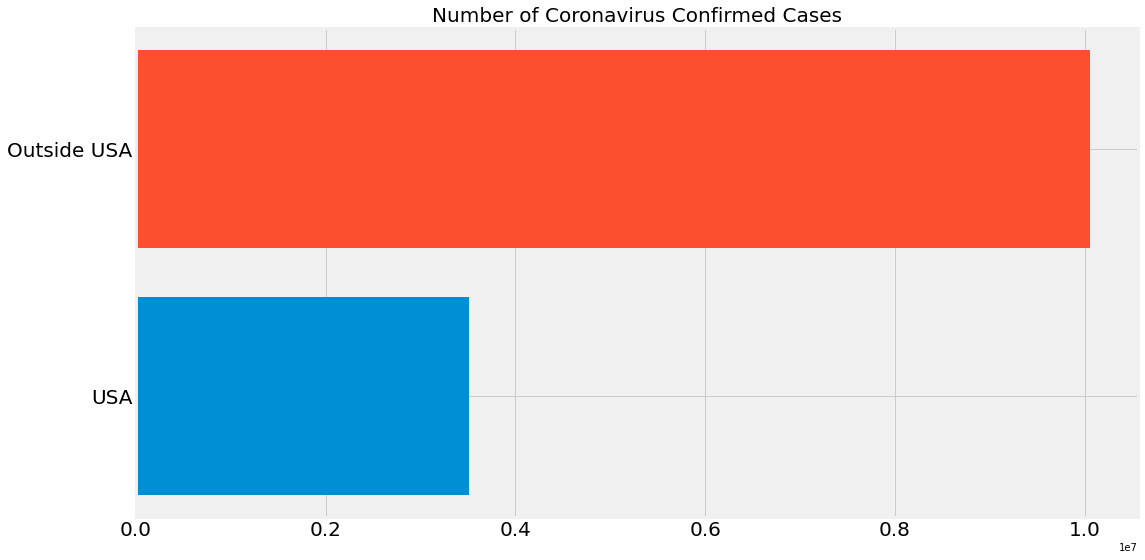

In [50]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(confirmed_by_country) - USA_confirmed
plt.figure(figsize=(16, 9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [51]:
print('Outside USA: {} cases'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA: 10058801 cases
USA: 3512816 cases
Total: 13571617 cases


In [52]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [53]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

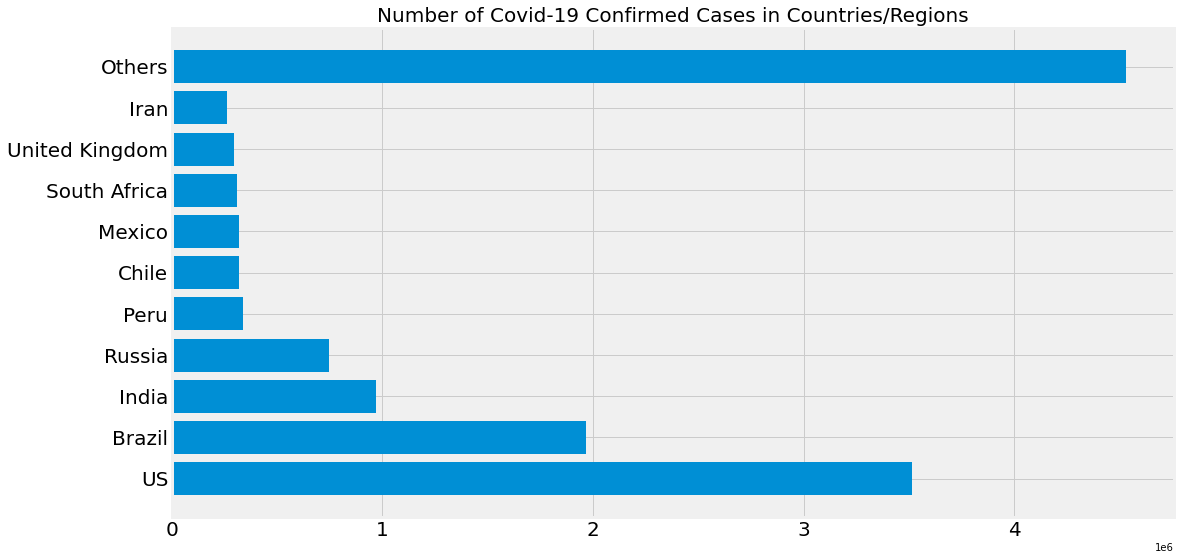

In [54]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [55]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

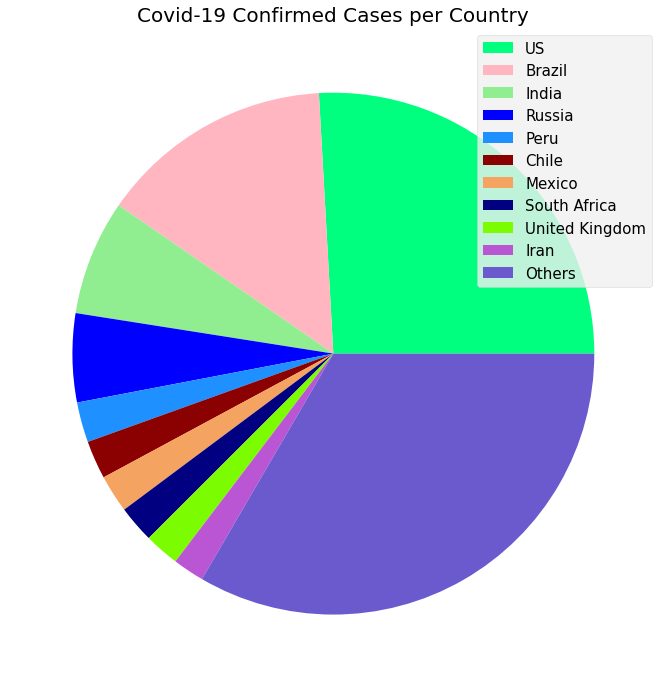

In [56]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [57]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

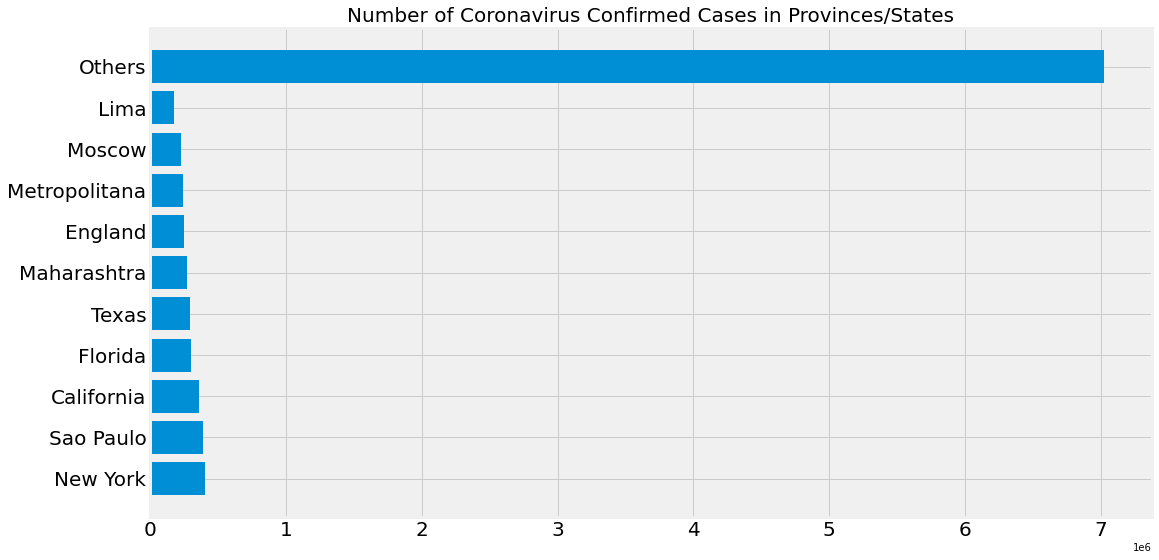

In [58]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [59]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 

    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

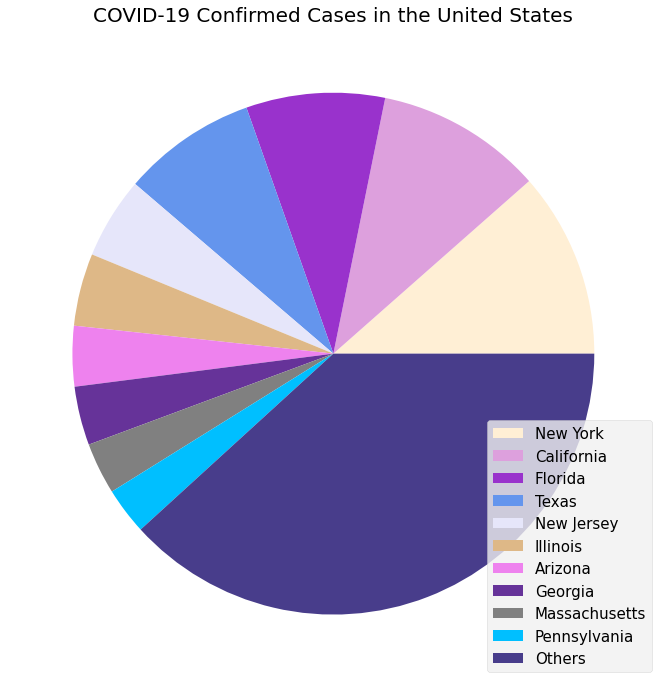

In [60]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

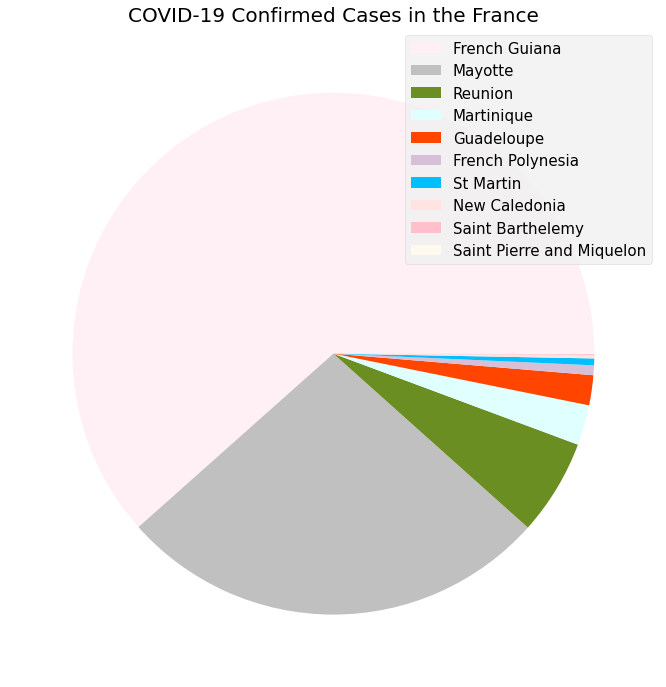

In [61]:
plot_pie_country_with_regions('France', 'COVID-19 Confirmed Cases in the France')

In [62]:
# Predicting the future

In [63]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [64]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [65]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [66]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [67]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 

In [68]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [69]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 5308130.339033653
MSE: 47300077452986.41


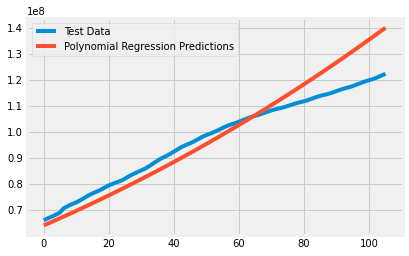

In [70]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [ ]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death)
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery)
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [ ]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

In [ ]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

In [ ]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

In [ ]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()